### EDA Dataset

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import nltk
from nltk.corpus import stopwords
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from wordcloud import WordCloud

from datasets import load_dataset, concatenate_datasets, ClassLabel, Features, Value

In [2]:
# download italian stop words
nltk.download('stopwords')

italian_stop_words = set(stopwords.words('italian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datascience/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# contains email and sentiment to add to the training dataset
# hand labelled
FILE_NAME = "second_dataset.csv"

In [4]:
# for my custom dataset
def remove_non_breaking_space(example):
    # Assuming the text is under the key 'text'
    example['text'] = example['text'].replace('\xa0', ' ')
    return example

def remove_email(example):
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    
    example['text'] = re.sub(email_pattern, '', example['text'])
    return example

In [5]:
# need to cast int to ClassLabel in order to be able to concatenate
features = Features({
    'text': Value('string'),
    'label': ClassLabel(names=['negative', 'neutral', 'positive'])
})

# remove the split and take (the only) train
DELIMITER = ","

my_csv_ds = load_dataset('csv', data_files=FILE_NAME, delimiter=DELIMITER, features=features)["train"]

# remove non breaking space
my_csv_ds = my_csv_ds.map(remove_non_breaking_space)
my_csv_ds = my_csv_ds.map(remove_email)

#### as Pandas Dataframe

In [6]:
my_csv_ds.set_format(type="pandas")

df = my_csv_ds[:]
df.head(10)

,text,label
0,Da: A: Oggetto: Richiesta Informazioni sui s...,1
1,Oggetto: Rifiuti Ingombranti in Via Pietro Mic...,0
2,Oggetto: Lodevole Qualità dei Servizi Gentili ...,2
3,Oggetto: Apprezzamento per la Gestione dell'Em...,2
4,Oggetto: Ringraziamenti per la Pulizia delle S...,2
5,Oggetto: Qualità dei Servizi Comunali Caro Com...,0
6,Oggetto: Segnalazione di Malfunzionamenti nell...,0
7,Oggetto: Richiesta di Appuntamento con l'Asses...,1
8,Salve sono utente5 volevo scrivervi per reclam...,0
9,Buongiorno sono Alberto Lupo e vorrei effettua...,0


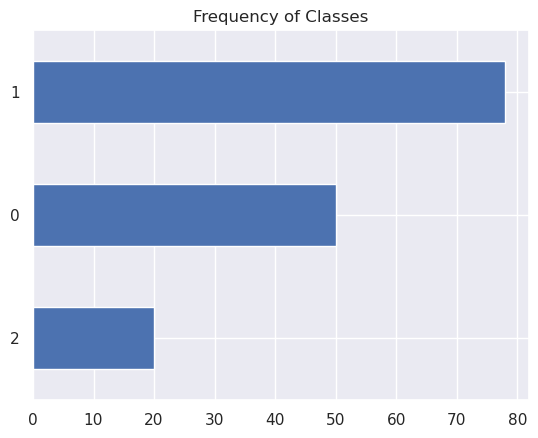

In [7]:
df["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

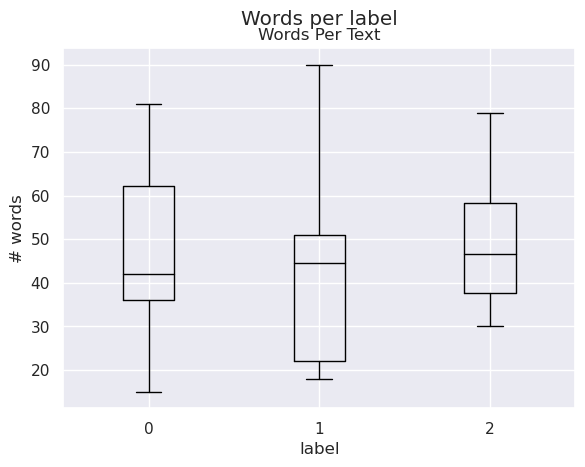

In [8]:
df["Words Per Text"] = df["text"].str.split().apply(len)

df.boxplot("Words Per Text", by="label", grid=True, showfliers=False,
           color="black")
plt.suptitle("Words per label")
plt.xlabel("label")
plt.ylabel("# words")
plt.show()

In [9]:
# prepare for Word Cloud
texts = list(df['text'].values)

# Join all texts into a single string
all_text = ' '.join(texts)

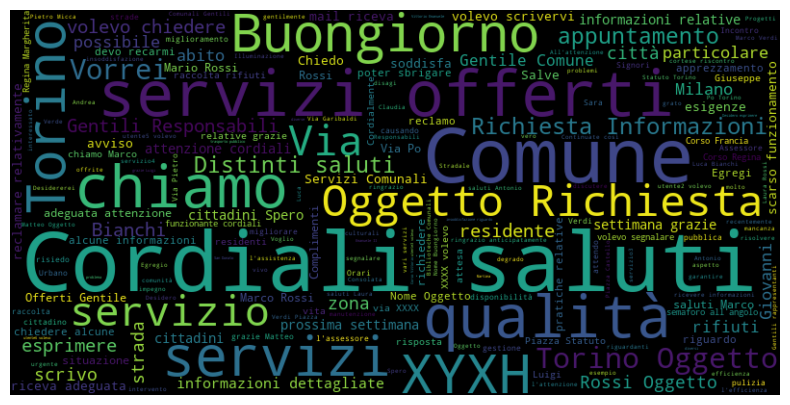

In [10]:
# Generate a word cloud image, removed Italian Stop words
wordcloud = WordCloud(stopwords=italian_stop_words, width=800, height=400).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### some simple stats

In [11]:
# make everything lowercase (to remove stop words all lowercase!)
all_text = ' '.join(texts).lower()

# Tokenize and remove non-alphabetic characters
words = re.findall(r'\b[a-z]+\b', all_text)

words = [word for word in words if word not in italian_stop_words]

# Count the frequency of each word
word_counts = Counter(words)

In [12]:
# Get the most common words
most_common_words = word_counts.most_common(10)  # Adjust the number as needed

In [13]:
word_freq = word_counts.items()

# Create a DataFrame
df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

df = df.sort_values(by='Frequency', ascending=False)

In [14]:
df.head(10)

,Word,Frequency
26,saluti,111
3,servizi,102
0,oggetto,99
16,comune,83
57,cordiali,82
42,torino,75
28,via,71
2,informazioni,67
89,rossi,66
4,offerti,55
